In [1]:
# Run but do not modify this code
import pandas as pd
import seaborn as sns
from ast import literal_eval

data1 = pd.read_csv("data1.csv")
data2 = pd.read_csv("data2.csv")
data3 = pd.read_csv("data3.csv")
data4 = pd.read_csv("data4.csv")
data1.head()

all_songs = pd.concat([data1, data2, data3, data4])
all_songs.head()


,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02


# Summary Stats

In [2]:
avg_danceability = all_songs["danceability"].mean()
avg_acousticness = all_songs["acousticness"].mean()
avg_valence = all_songs["valence"].mean()

print("average danceability:") 
print(avg_danceability)
print("average acousticness: ")
print(avg_acousticness)
print("average valence(positivity): ")
print(avg_valence)


average danceability:
0.49305652179149567
average acousticness: 
0.44675109819685244
average valence(positivity): 
0.42798662251866953


# How features change over time

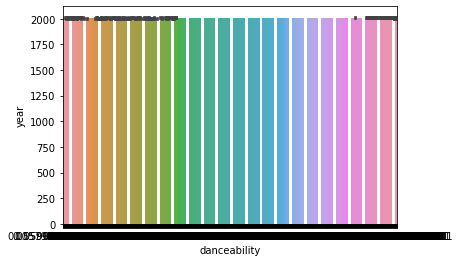

In [4]:
sns.barplot(x = "danceability", y="year", data=all_songs[all_songs["year"] > 1968]) #there are a few songs from before the 1970s but not many  
#sns.barplot(x = "acousticness", y="year", data=all_songs[all_songs["year"] > 1968])
#sns.barplot(x = "valence", y="year", data=all_songs[all_songs["year"] > 1968])


# Model

In [2]:
artist = []
for a in all_songs["artists"].apply(literal_eval):
    artist.append(a[0])
    
all_songs["artist"] = artist
    

In [3]:
from sklearn.model_selection import train_test_split

data = all_songs[["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness",
                  "instrumentalness", "liveness", "valence", "tempo"]]
target = all_songs["artist"]

train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.7, random_state=216)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(train_data, train_target)
predicted = logistic_model.predict(test_data)

q2_score = accuracy_score(y_true=q2_test_target, y_pred=predicted)
print("accuracy:", q2_score)
